In [2]:
import numpy as np
import pandas as pd
import scipy.io as scp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as sts
import xlsxwriter 
import scipy as scy
from PIL import Image
plt.style.use('seaborn-paper')
plt.rc('text',usetex=True)
%matplotlib inline

In [3]:
data = pd.read_excel('Calib_no_silent_one_rep.xlsx',index_col = [0])

In [4]:
shift = data.columns.values[3:]

# Poisson noise 

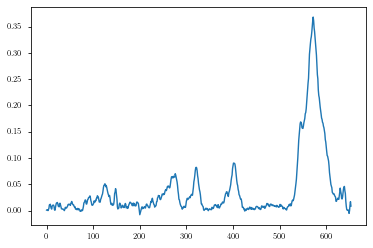

In [5]:
signal = data.iloc[17,:].values[3:]
plt.plot(signal)

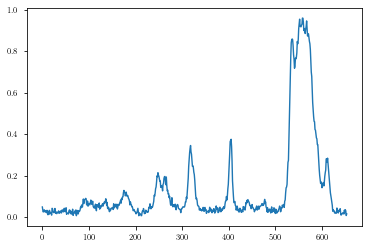

In [6]:
signal1 = data.iloc[4,:].values[3:]
plt.plot(signal1)

In [7]:
def poisson_noise(signal,mu,depth):
    "Returns a signal corrupted by factor% shot noise"
    
    signal[signal<0]=0
    vals = len(np.unique(signal))
    vals = 2 ** np.ceil(np.log2(vals))

    return np.random.poisson(signal*vals/np.exp(((mu)/10000)*depth)) / float(vals)

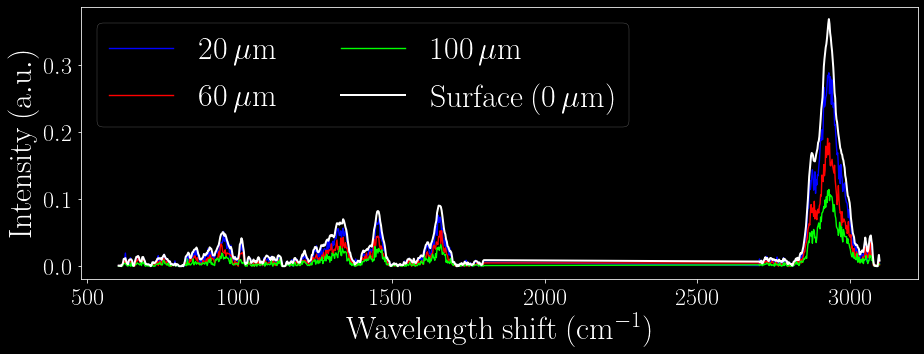

In [16]:
mu = 120.34 #mu eff in cm^-1
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
color = ['blue','red','lime']
for i,depth in enumerate(np.arange(20,115,40)):
    plt.plot(shift,poisson_noise(signal,mu,depth),label ='$\mathrm{'+ str(int(depth))+'\,\mu m}$',\
             alpha = 1,color = color[i])
plt.plot(shift,signal,label = '$\mathrm{Surface\:(0\,\mu m)}$',color = 'white',linewidth = 2)
plt.legend(fontsize = 32,ncol =2 )
plt.tick_params(labelsize=24)
plt.xlabel('$\mathrm{Wavelength\: shift\:(cm^{-1})}$', fontsize=32)
plt.ylabel('$\mathrm{Intensity\:(a.u.)}$', fontsize=32)
#plt.title('$\mu_{total} ='+str(mu)+' \:cm^{-1}$',fontsize = 22)
plt.savefig('black backgr 150 mgmL dephtlike noisy data', dpi = 300,bbox_inches='tight')

Text(0.5, 1.0, '$\\mu_{total} =120.34 \\:cm^{-1}$')

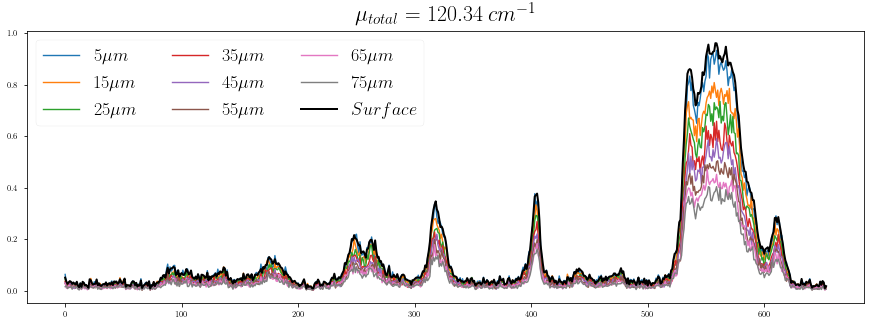

In [7]:
mu = 120.34#mu eff in cm^-1

plt.figure(figsize=(15,5))
for depth in np.arange(5,80,10):
    plt.plot(poisson_noise(signal1,mu,depth),label ='$'+ str(int(depth))+'\mu m$',alpha = 1)
plt.plot(signal1,label = '$Surface$',color = 'black',linewidth = 2)
plt.legend(fontsize = 18,ncol =3 )
plt.title('$\mu_{total} ='+str(mu)+' \:cm^{-1}$',fontsize = 22)